In [ ]:
# This is a model selction notebook for predicting delivery times using nueral network training w TensorFlow

In [ ]:
""""
some code attribution 
1. Raschka, S. (2015). Python Machine Learning. Birmingham, England: Packt Publishing.
2. Lopez de Prado, M. (2018). Advances in financial machine learning. Nashville, TN: John Wiley & Sons.
3. Hull, J.C. (2019). Machine Learning in Business.  

""""

In [53]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.preprocessing import RobustScaler

In [153]:
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(tf.__version__)

2.4.0


Using TensorFlow backend.


In [86]:
# load data
DATA_FOLDER = 'C:/Users/bscot/OneDrive/Documents/DoorDash/DoorDash2'
data = pd.read_csv(os.path.join(DATA_FOLDER, 'historical_imputed.csv'))
X1 = data.drop('total delivery duration seconds', axis=1)
transformer = RobustScaler().fit(X1)
X2 = transformer.transform(X1)
X = pd.DataFrame(X2, columns = X1.columns)
y = data[['total delivery duration seconds']]

# divide data into training set and test set for holdout method
X_train_scaled,X_test_scaled,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

print('X_scaled_train dataframe is: ',X_scaled_train.shape)
print('y_train dataframe is: ',y_train.shape)
print('X_scaled_test dataframe is: ',X_scaled_test.shape)
print('y_test dataframe is: ',y_test.shape)

X_scaled_train dataframe is:  (157942, 90)
y_train dataframe is:  (157942, 1)
X_scaled_test dataframe is:  (39486, 90)
y_test dataframe is:  (39486, 1)


In [87]:
# check contents
X_scaled_train = pd.DataFrame(X_scaled_train, columns = X1.columns)
X_scaled_test = pd.DataFrame(X_scaled_test, columns = X1.columns)
y_train = pd.DataFrame(y_train, columns = y.columns)
y_test = pd.DataFrame(y_test, columns = y.columns)
print(X_scaled_train.head(10))
print(X_scaled_test.head(10))
#print(y_train.head(10))
#print(y_test.head(10))

   market_id  store_id  order_protocol  total_items  subtotal  \
0       -0.5 -0.173263       -0.666667         -1.0 -0.549649   
1        1.5  0.402989        0.000000          0.0  0.173019   
2       -0.5  0.604484       -0.666667         -0.5  0.145436   
3       -0.5 -0.403820        0.000000          2.5  1.818455   
4       -0.5 -0.563797        0.666667          0.0  0.075226   
5        0.5  0.022142        0.000000         -0.5 -0.351053   
6       -0.5  0.120122       -0.666667         -0.5 -0.391174   
7       -1.0 -0.732355       -0.333333         -1.0 -0.652457   
8       -0.5 -0.526709        0.666667          0.0 -0.151956   
9        1.0  0.883753       -0.666667         -0.5 -0.328485   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                -0.5        0.129231       -0.699160               0.454545   
1                 0.5        0.161538       -0.411765               0.022727   
2                 0.0        0.769231       

In [154]:
# define model
perceptron_model = keras.models.Sequential([Dense(20,activation = "sigmoid",input_shape = (90,)),
                                             Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                                Dense(1)])

perceptron_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 20)                1820      
_________________________________________________________________
dense_33 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_34 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 21        
Total params: 2,681
Trainable params: 2,681
Non-trainable params: 0
_________________________________________________________________


In [172]:
# compile model
perceptron_model.compile(optimizer='adam', loss='mae')

In [173]:
# save checkpoints
checkpoint = keras.callbacks.ModelCheckpoint("best_model", save_best_only = True)
# early stopping trigger
kickout = keras.callbacks.EarlyStopping(patience = 100, restore_best_weights = True)

In [177]:
t0_nn = time()
# train model 
num_epochs = 3000
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size/batch_size)
# data set length must be >= (training/batch)*epochs
#
history=perceptron_model.fit(X_scaled_train,y_train,
                             epochs=num_epochs,
                             steps_per_epoch=steps_per_epoch,
                             #callbacks=[checkpoint,kickout],
                             verbose=0)

print("done in %0.3fs" % (time() - t0_nn))

done in 705.752s


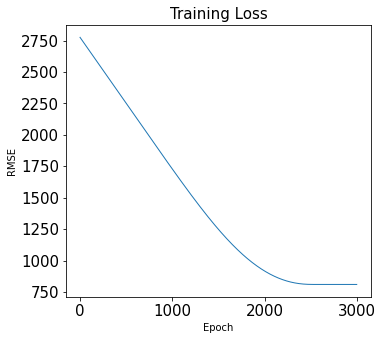

In [178]:
# visualize learning curve
hist = history.history
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(hist['loss'],lw=1)
ax.set_title('Training Loss',size=15)
ax.set_xlabel('Epoch',size=10)
ax.set_ylabel('RMSE',size=10)
ax.tick_params(axis='both',which='major',labelsize=15)
#
plt.show()

In [179]:
# eval trained model on test set
mae_nn_test = perceptron_model.evaluate(X_scaled_test,y_test,verbose=0)
print('Neural network RMSE on test set:', mae_nn_test)

Neural network RMSE on test set: 801.0652465820312


In [186]:
predictions = perceptron_model.predict(X_scaled_test)
predictions_pd = pd.DataFrame(predictions, columns = ['predicted duration'])
predictions_concat = pd.concat([y_test,predictions_pd], axis=1)
predictions_concat.to_csv (r'C:/Users/bscot/OneDrive/Documents/DoorDash/DoorDash2/tensorflow_predict.csv', index = False, header=True)
print(predictions)

ValueError: in user code:

    C:\Users\bscot\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\bscot\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        If unspecified, `use_multiprocessing` will default to `False`.
    C:\Users\bscot\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        for t, v in value_destination_pairs
    C:\Users\bscot\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        
    C:\Users\bscot\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        
    C:\Users\bscot\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        max_queue_size: maximum size for the generator queue
    C:\Users\bscot\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        
    C:\Users\bscot\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        self._symbolic_add_metric(value, aggregation, name)
    C:\Users\bscot\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        

    ValueError: Input 0 of layer sequential_8 is incompatible with the layer: expected axis -1 of input shape to have value 90 but received input with shape (None, 1)
